# Machine Learning Experiment Tracking with MLFlow

This tutorial showcases how you can use MLflow end-to-end to:

 - Train a linear regression model
 - Package the code that trains the model in a reusable and reproducible model format
 - Deploy the model into a simple HTTP server that will enable you to score predictions

The focus here is on MLFlow not machine learning

In [1]:
# Load libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
import mlflow 
import mlflow.sklearn

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Data

In [2]:
# Load Iris data
data = load_iris()
#data

In [3]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# Split data into training and test datasets
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

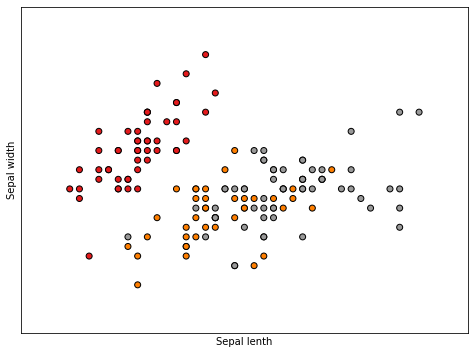

In [7]:
# Generate some plots
X = data.data[:, :2]
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
plt.figure(2, figsize=(8,6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal lenth')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(data.data)
ax.scatter(X_reduced[:,0], X_reduced[:,1], X_reduced[:,2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title('First three PCA directions')
ax.set_xlabel('1st eigenvector')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('2nd eigenvector')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('3rd eigenvector')
ax.w_zaxis.set_ticklabels([])

fig.savefig('iris1.png')
plt.close()

display()

## Model Development
### Training & Tracking

In [9]:
# Tracking with mlflow
with mlflow.start_run():
    dtc = DecisionTreeClassifier(random_state=10)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(accuracy)
    
    mlflow.log_param("random_state", 10)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(dtc, "model")
    modelpath = "model-%s-%f" % ("decision_tree", 1)
    mlflow.sklearn.save_model(dtc, modelpath)
    
    mlflow.log_artifact("iris1.png")

0.9736842105263158


c:\users\m. a. shahin\appdata\local\programs\python\python39\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


In [10]:
with mlflow.start_run():
    dtc = DecisionTreeClassifier(max_depth=1, random_state=10)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(accuracy)
    
    mlflow.log_param("random_state", 10)
    mlflow.log_param("max_depth", 1)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(dtc, "model")
    modelpath = "model-%s-%f" % ("decision_tree", 2)
    mlflow.sklearn.save_model(dtc, modelpath)

0.6052631578947368


In [11]:
with mlflow.start_run():
    dtc = DecisionTreeClassifier(max_depth=1, min_samples_split=5, random_state=10)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(accuracy)
    
    mlflow.log_param("random_state", 10)
    mlflow.log_param("max_depth", 1)
    mlflow.log_param("min_samples_split", 5)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(dtc, "model")
    modelpath = "model-%s-%f" % ("decision_tree", 3)
    mlflow.sklearn.save_model(dtc, modelpath)

0.6052631578947368


In [12]:
k = 1
with mlflow.start_run():
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(accuracy)
    mlflow.log_param("n_neighbors", k)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(knn, "model")
    modelpath = "model-%s-%f" % ("knn", 4)
    mlflow.sklearn.save_model(dtc, modelpath)

0.9736842105263158


In [13]:
k = 2
with mlflow.start_run():
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(accuracy)
    mlflow.log_param("n_neighbors", k)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(knn, "model")
    modelpath = "model-%s-%f" % ("knn", 5)
    mlflow.sklearn.save_model(dtc, modelpath)

0.9473684210526315


In [14]:
k = 5
with mlflow.start_run():
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(accuracy)
    mlflow.log_param("n_neighbors", k)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(knn, "model")
    modelpath = "model-%s-%f" % ("knn", 6)
    mlflow.sklearn.save_model(dtc, modelpath)

0.9736842105263158


In [15]:
mlflow.search_runs()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.accuracy,params.n_neighbors,params.random_state,params.min_samples_split,params.max_depth,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.source.name,tags.mlflow.user,tags.mlflow.log-model.history
0,79e42b63d5c3497d8f907cb049f29292,0,FINISHED,file:///C:/Users/M.%20A.%20Shahin/MLFlow/mlrun...,2022-10-17 15:30:54.529000+00:00,2022-10-17 15:31:05.797000+00:00,0.973684,5,None,None,None,LOCAL,sneaky-ox-401,c:\users\m. a. shahin\appdata\local\programs\p...,M. A. Shahin,"[{""run_id"": ""79e42b63d5c3497d8f907cb049f29292""..."
1,7dd0110d4bdc4d3b8d331b027d5086aa,0,FINISHED,file:///C:/Users/M.%20A.%20Shahin/MLFlow/mlrun...,2022-10-17 15:30:43.063000+00:00,2022-10-17 15:30:54.488000+00:00,0.947368,2,None,None,None,LOCAL,able-jay-582,c:\users\m. a. shahin\appdata\local\programs\p...,M. A. Shahin,"[{""run_id"": ""7dd0110d4bdc4d3b8d331b027d5086aa""..."
2,95ee837cc8e34028af98c3a1d9bed95a,0,FINISHED,file:///C:/Users/M.%20A.%20Shahin/MLFlow/mlrun...,2022-10-17 15:30:31.267000+00:00,2022-10-17 15:30:43.023000+00:00,0.973684,1,None,None,None,LOCAL,thundering-crane-304,c:\users\m. a. shahin\appdata\local\programs\p...,M. A. Shahin,"[{""run_id"": ""95ee837cc8e34028af98c3a1d9bed95a""..."
3,d129a5ecd1d74685bdd48d8bc4ae44e0,0,FINISHED,file:///C:/Users/M.%20A.%20Shahin/MLFlow/mlrun...,2022-10-17 15:30:20.199000+00:00,2022-10-17 15:30:31.229000+00:00,0.605263,None,10,5,1,LOCAL,learned-fish-596,c:\users\m. a. shahin\appdata\local\programs\p...,M. A. Shahin,"[{""run_id"": ""d129a5ecd1d74685bdd48d8bc4ae44e0""..."
4,063976a598504e74bea30a116488b065,0,FINISHED,file:///C:/Users/M.%20A.%20Shahin/MLFlow/mlrun...,2022-10-17 15:30:08.143000+00:00,2022-10-17 15:30:20.147000+00:00,0.605263,None,10,None,1,LOCAL,youthful-rat-442,c:\users\m. a. shahin\appdata\local\programs\p...,M. A. Shahin,"[{""run_id"": ""063976a598504e74bea30a116488b065""..."
5,59fb009ef94d4fefab4b59b9be9cc801,0,FINISHED,file:///C:/Users/M.%20A.%20Shahin/MLFlow/mlrun...,2022-10-17 15:29:55.017000+00:00,2022-10-17 15:30:08.103000+00:00,0.973684,None,10,None,None,LOCAL,skittish-midge-595,c:\users\m. a. shahin\appdata\local\programs\p...,M. A. Shahin,"[{""run_id"": ""59fb009ef94d4fefab4b59b9be9cc801""..."


### Comparing the Models
Next, use the MLflow UI to compare the models that you have produced. In the same current working directory as the one that contains the mlruns run:

`$ mlflow ui                                                                                                                `

and view it at http://localhost:5000. On this page, you can see a list of experiment runs with metrics you can use to compare the models as follows.


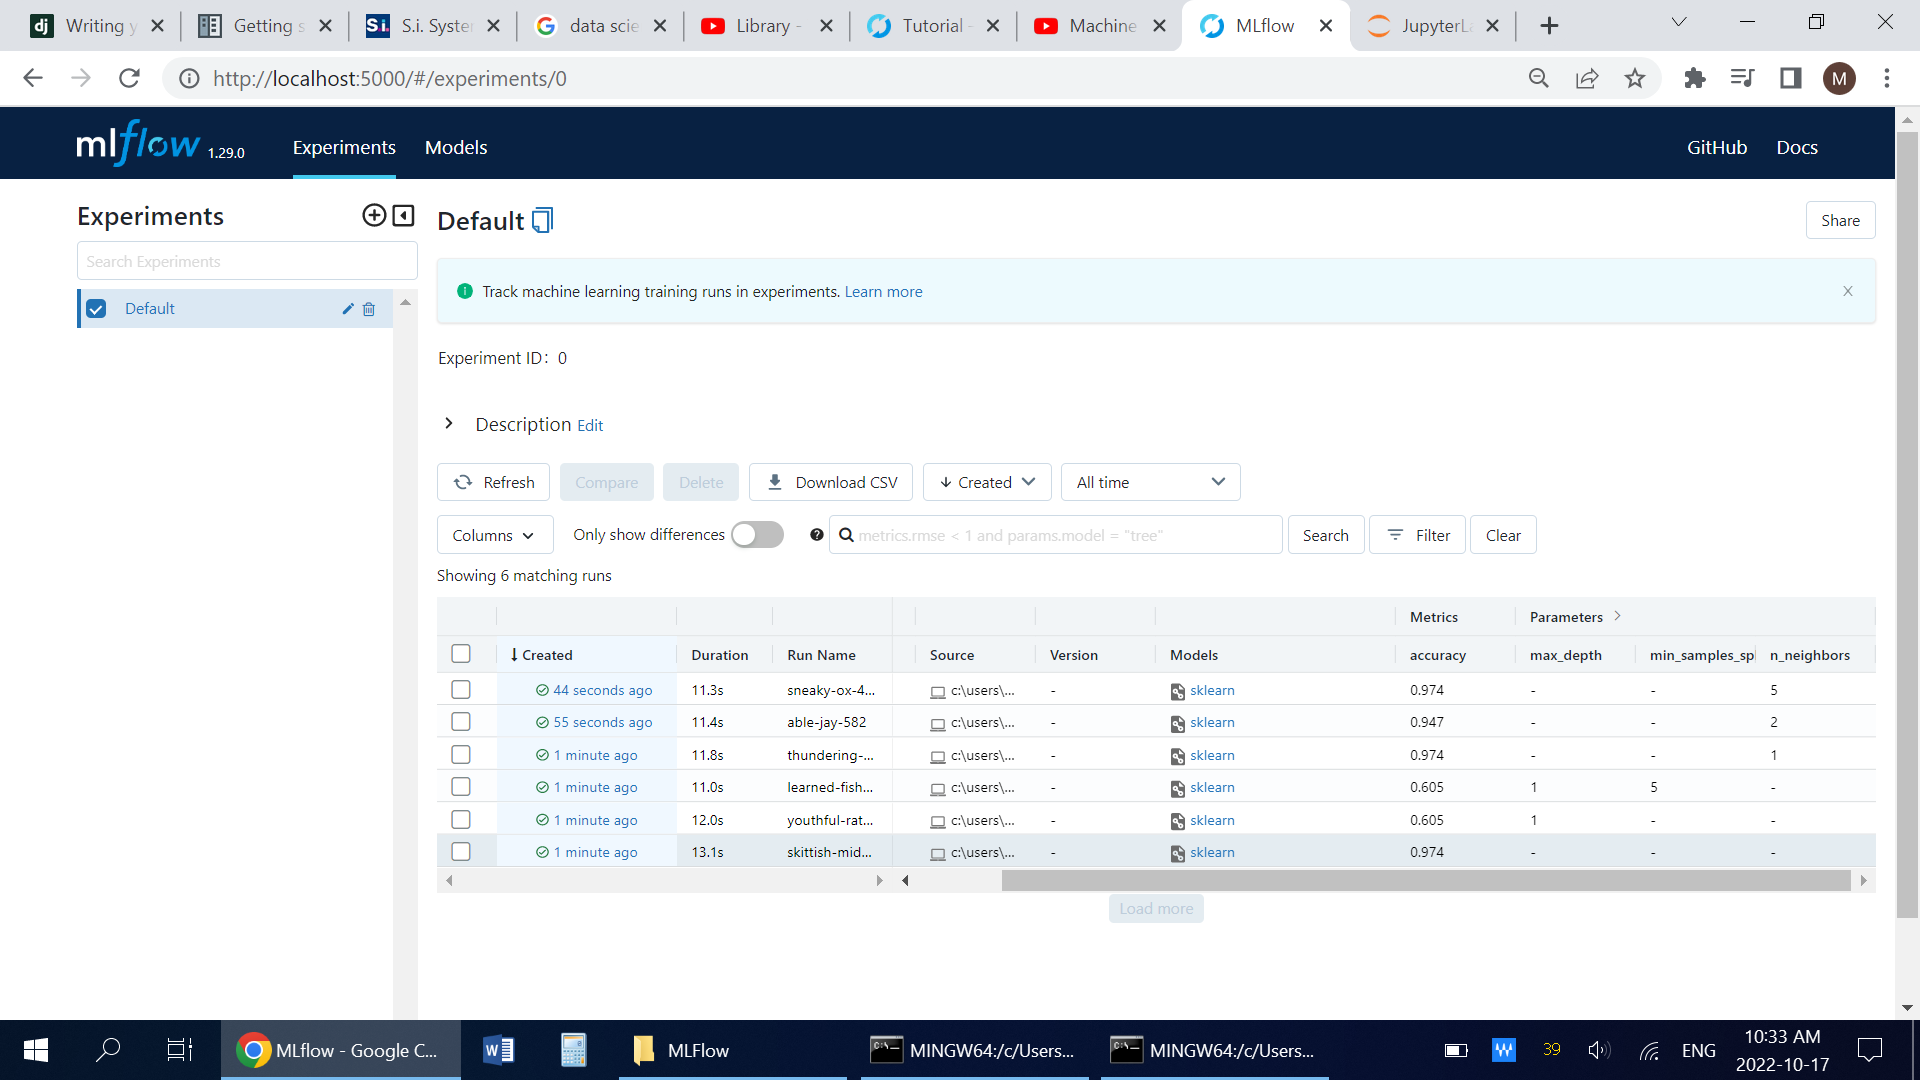

You can use the search feature to quickly filter out many models. For example, the query metrics.accuracy > 0.9 returns all the models with accuracy greater than 90%. For more complex manipulations, you can download this table as a CSV and use your favorite data munging software to analyze it.



## Model Packing & Deployment

In [18]:
run_id1 = "79e42b63d5c3497d8f907cb049f29292"  # copy from uri
model_uri = "runs:/" + run_id1 + "/model"

In [19]:
model = mlflow.sklearn.load_model(model_uri=model_uri)

In [20]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [21]:
model.predict_proba(X_test)

array([[0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.8, 0.2],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ]])